In [2]:
import os
import json
import pandas as pd
import numpy as np
while os.getcwd() != '/home/jupyter/crisp':
    os.chdir("..")
from utils.gcp_helpers import get_dataframe_from_bucket
%pwd

'/home/jupyter/crisp'

In [3]:
interest_genes = list(get_dataframe_from_bucket("Radiation/mouse/combined/mouse.combined.expression.071121.tsv","ah21_data", "ah21_data", sep="\t").T.iloc[0])

In [4]:
GLDS_mice = np.log(get_dataframe_from_bucket("Radiation/mouse/GLDS156/GLDS156.expression.071121.tsv",
                                             "ah21_data", "ah21_data", sep="\t").set_index('GeneName').T[interest_genes])
GSE1_mice = np.log(get_dataframe_from_bucket("Radiation/mouse/GSE124612/GSE124612.expression.071121.tsv",
                                             "ah21_data", "ah21_data", sep="\t").set_index('GeneName').T[interest_genes])
GSE6_mice = np.log(get_dataframe_from_bucket("Radiation/mouse/GSE62623/GSE62623.expression.071121.tsv",
                                             "ah21_data", "ah21_data", sep="\t").set_index('GeneName').T[interest_genes])

In [8]:
GSE6_mice.shape

(48, 16353)

In [22]:
GLDSMice = (GLDS_mice)  - GLDS_mice.mean() / GLDS_mice.std()
GSE1Mice = (GSE1_mice)  - GSE1_mice.mean() / GSE1_mice.std()
GSE6Mice = (GSE6_mice)  - GSE6_mice.mean() / GSE6_mice.std()
dataset_mice = {'GLDS':GLDSMice,'GSE1':GSE1Mice, 'GSE6':GSE6Mice}
combined_frame = pd.concat(dataset_mice.values())

In [23]:
# have now removed low dose rate Xray data from this dataset - will not correspond to acute radiation condition

In [24]:
metadata = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.metadata.combined.071121.csv","ah21_data", "ah21_data", sep=",")
merged_data = pd.merge(metadata, combined_frame, left_on="sample", right_index=True)
merged_data["irradiated"] = [1. if x == "Yes" else 0. for x in  merged_data.irradiated.values]
merged_data[merged_data.radiation != 'Low-dose-rate_Xray']
dataset_file = "data/mouse_crisp_input_normalised_per_group.pkl"
merged_data.to_pickle(dataset_file)

In [25]:
# create train data

dataset_file = "data/mouse_crisp_input_GSE124612.pkl"
data = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.combined.expression.071121.tsv","ah21_data", "ah21_data", sep="\t")
data = data.T
data.columns = data.iloc[0]
data = data.iloc[1:]
data = data.astype(float)
metadata = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.metadata.combined.071121.csv","ah21_data", "ah21_data", sep=",")
merged_data = pd.merge(metadata, data, left_on="sample", right_index=True)
merged_data = merged_data[merged_data.dataset == "GSE124612"]
merged_data["irradiated"] = [1. if x == "Yes" else 0. for x in  merged_data.irradiated.values]
merged_data[merged_data.radiation != 'Low-dose-rate_Xray']
merged_data.to_pickle(dataset_file)

In [26]:
# create train data

dataset_file = "data/mouse_crisp_input.pkl"
data = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.combined.expression.071121.tsv","ah21_data", "ah21_data", sep="\t")
data = data.T
data.columns = data.iloc[0]
data = data.iloc[1:]
data = data.astype(float)
metadata = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.metadata.combined.071121.csv","ah21_data", "ah21_data", sep=",")
merged_data = pd.merge(metadata, data, left_on="sample", right_index=True)
# merged_data = merged_data[merged_data.dataset == "GSE124612"]
merged_data["irradiated"] = [1. if x == "Yes" else 0. for x in  merged_data.irradiated.values]
merged_data[merged_data.radiation != 'Low-dose-rate_Xray']
merged_data.to_pickle(dataset_file)

In [ ]:
merged_data.

In [140]:
merged_data

,sample,organism,gender,strain,dose_Gy,radiation,timepoint_hr,dataset,irradiated,0610005C13Rik,...,Zswim5,Zswim6,Zw10,Zwilch,Zwint,Zxdc,Zyx,Zzef1,Zzz3,a
0,GSM821301,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No,4.314778,...,-3.246014,-3.894180,-2.009492,-1.338318,-7.685092,-1.160747,-17.037200,-3.714335,-0.452098,-3.111133
1,GSM821298,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No,0.900681,...,-2.577110,-3.155420,-1.611851,-1.099590,-7.095585,-1.061676,-16.197687,-3.290741,-0.433429,-2.173004
2,GSM821295,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No,0.935005,...,-2.296023,-3.054346,-2.136195,-1.139816,-7.231483,-1.246356,-15.718992,-3.399338,-0.873690,-1.994291
3,GSM821296,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No,0.299815,...,-3.192959,-2.740856,-2.003096,-1.234003,-6.458274,-0.725016,-15.609567,-2.905552,-0.299904,-2.793746
4,GSM821300,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No,0.730136,...,-2.836523,-2.949431,-2.487757,-1.987079,-7.163750,-1.265532,-15.893389,-3.544289,-1.097163,-2.590590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,GSM1530198,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes,2.704764,...,-0.511735,-2.024178,-3.737194,-0.934346,-9.847387,-2.196564,-4.817466,-2.624891,-1.764902,-0.784352
310,GSM1530199,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes,1.621394,...,-1.276881,-2.344050,-4.482282,-1.138788,-8.864524,-2.255908,-5.151109,-2.588352,-2.517227,-1.591224
311,GSM1530200,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes,1.315689,...,-1.167638,0.019574,-3.031814,-0.083740,-8.122402,-0.576201,-4.939882,-0.277799,0.383585,-1.439087
312,GSM1530201,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes,1.668145,...,-1.889892,-1.693223,-3.952342,-1.056533,-8.754040,-1.975318,-5.339623,-1.941265,-1.354434,-1.052747


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


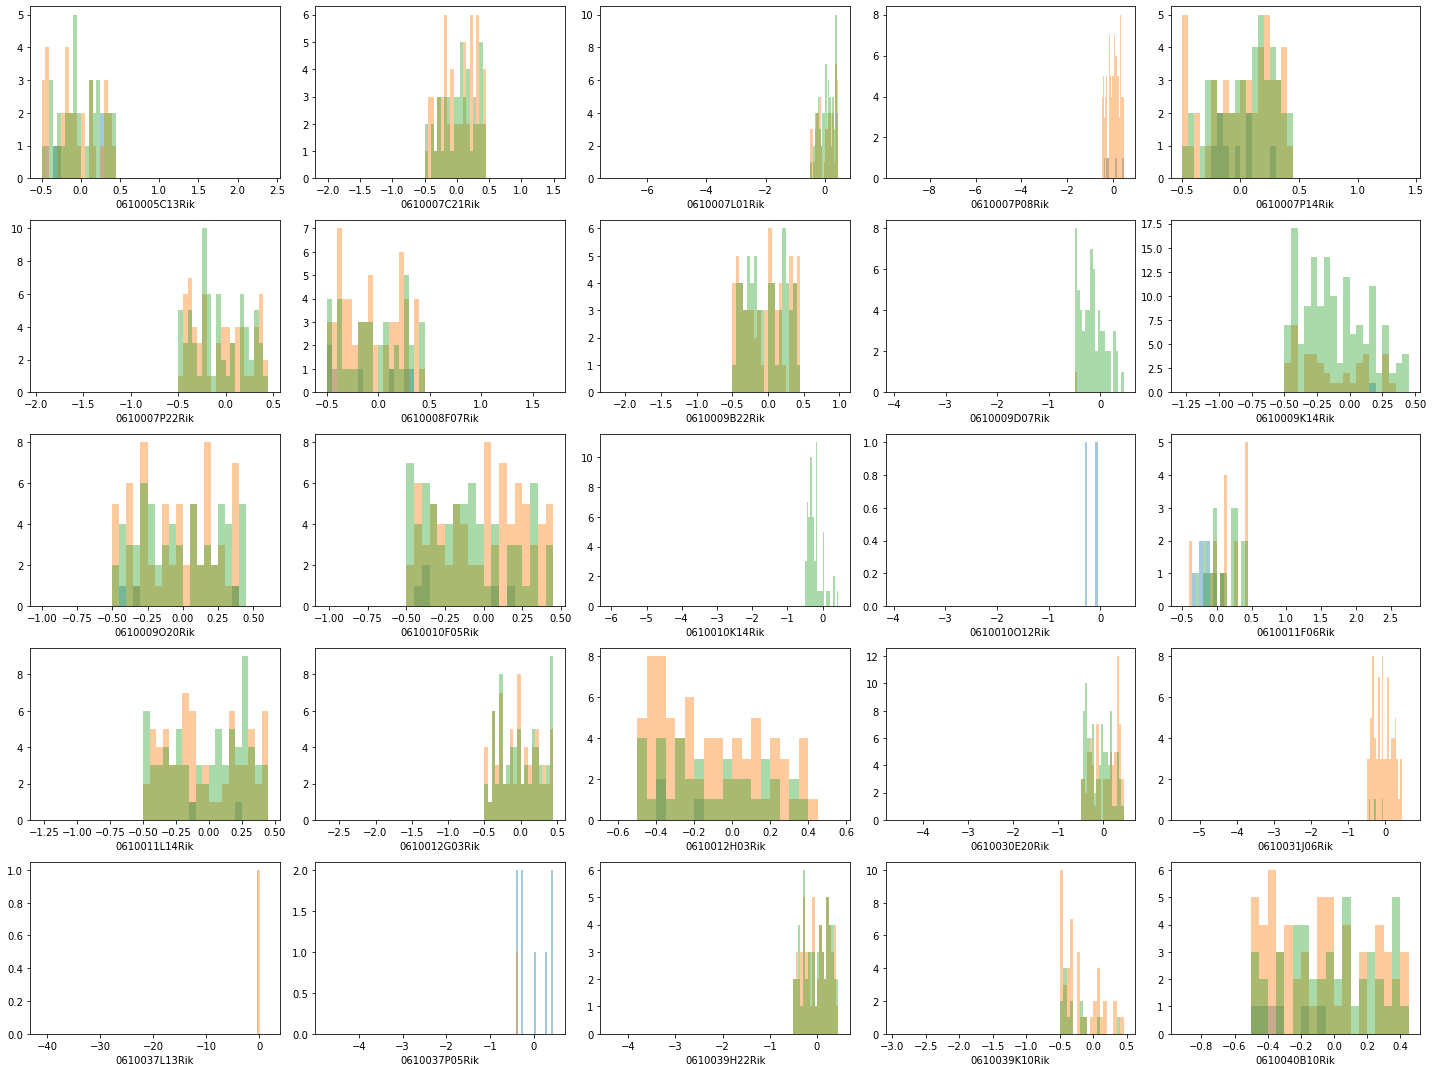

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,5, figsize=(20,15))
idx = 0
for i in range(5):
    for j in range(5):
        for dataset in dataset_mice:
            gene = dataset_mice[dataset][interest_genes[idx]]
            sns.distplot(gene, bins=np.arange(-.5, .5, 0.05), ax=axs[i,j], kde=False)#.set(xlim=(-0.5,0.5))
        idx += 1
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


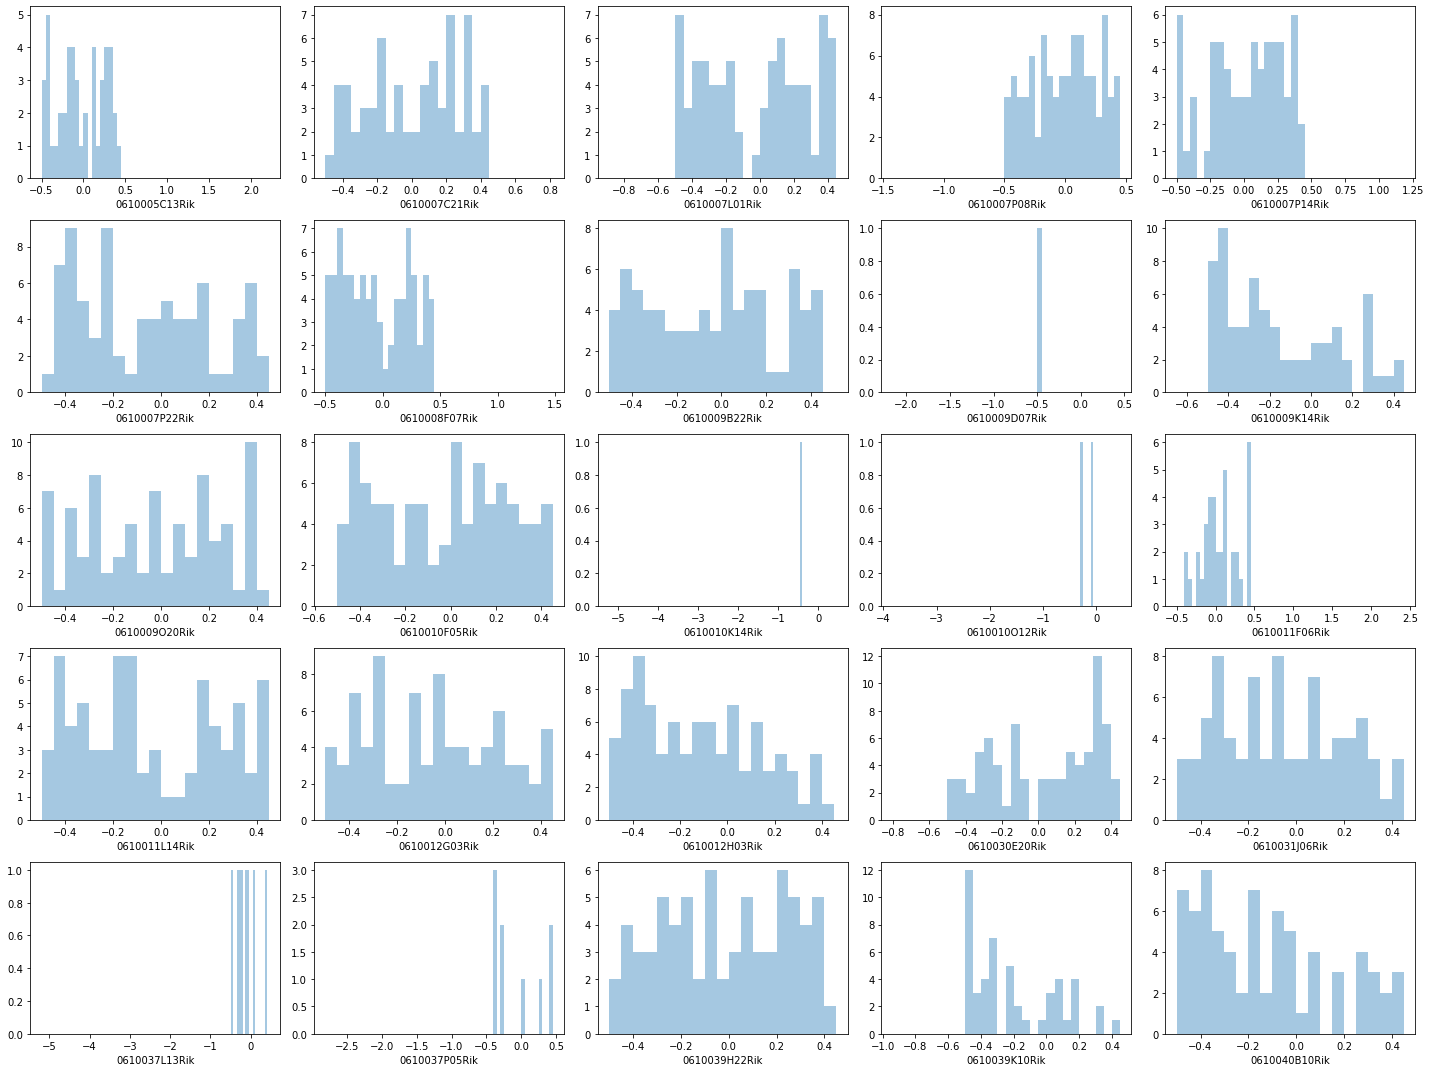

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,5, figsize=(20,15))
idx = 0
for i in range(5):
    for j in range(5):
        gene = combined_frame[interest_genes[idx]]
        sns.distplot(gene, bins=np.arange(-.5, .5, 0.05), ax=axs[i,j], kde=False)#.set(xlim=(-0.5,0.5))
        idx += 1
plt.tight_layout()